## Top 5 jogos da Steam em 2024-06-20

### Nomes e IDs:
1. Banana: 2923300
2. Counter Strike 2: 730
3. Elden Ring: 1245620
4. Dota 2: 570
5. PUBG Battlegrounds: 578080

### 1 Passo: baixar os dados 
- Baixar 1.000 comentários para cada um dos cinco jogos
- Baixar os outros dados sobre cada comentário e o usuário para futuro modelo

### 2 Passo: Visualizar os dados
- Limpeza dos dados: remoção de stopwords, emojis e caracteres especiais.
- Tokenização e lematização.
- Estruturação dos dados para facilitar a análise.

### 3 Passo: Aplicação de ferramentas de PLN
- Implementação de modelos de análise de sentimento (VADER, TextBlob,
BERT).
- Treinamento e validação dos modelos.
- Classificação dos dados em positivo, neutro e negativo.

### 4 Passo: Análise e resultado
- Compilação dos resultados da análise de sentimento.
- Visualização dos dados (gráficos, tabelas).
- Redação do relatório final com conclusões e insights.


---

### Bibliotecas utilizadas

In [2]:
import requests
import pprint
import json
from urllib.parse import urlencode, quote_plus, quote
import pendulum
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [3]:
sns.set_theme(style='white')
folder_path = '/Users/administrador/Documents/Pessoal/sentiment_analysis_python'

Funções utilizadas

In [4]:
def request_dados(jogo, url, params, n_requests):
    reviews = []
    cont = 1
    
    for i in range(n_requests):
        r = requests.get(url, params=params)
        response = json.loads(r.text)
        reviews.extend([review for review in response['reviews']])
        params['cursor'] = response['cursor']
        print(f"{jogo} - {int(response['query_summary']['num_reviews'])*cont} comentários")
        cont += 1

    return reviews

---

### 1 Passo: baixar os dados

Informação dos jogos e parâmetros para requisição dos comentários

[Link para documentação](https://partner.steamgames.com/doc/store/getreviews)

In [5]:
jogos = {
"Banana": "2923300",
"Counter Strike 2": "730",
"Elden Ring": "1245620",
"Dota 2": "570",
"PUBG Battlegrounds": "578080"}


Requisição dos dados de avaliações positivas

In [6]:
reviews= {}
n_requests = 5
params = {
    'json': '1',
    'filter': 'recent',
    'language': 'english',
    'review_type': 'positive',
    'purchase_type': 'all',
    'num_per_page': '100',
    'cursor': '*'
}

for jogo in jogos.keys():
    url = url = f'https://store.steampowered.com/appreviews/{jogos[jogo]}'
    
    reviews[jogo] = request_dados(jogo, url, params, n_requests)    

    params['cursor'] = "*"

Banana - 100 comentários
Banana - 200 comentários
Banana - 300 comentários
Banana - 400 comentários
Banana - 500 comentários
Counter Strike 2 - 100 comentários
Counter Strike 2 - 200 comentários
Counter Strike 2 - 300 comentários
Counter Strike 2 - 400 comentários
Counter Strike 2 - 500 comentários
Elden Ring - 100 comentários
Elden Ring - 200 comentários
Elden Ring - 300 comentários
Elden Ring - 400 comentários
Elden Ring - 500 comentários
Dota 2 - 100 comentários
Dota 2 - 200 comentários
Dota 2 - 300 comentários
Dota 2 - 400 comentários
Dota 2 - 500 comentários
PUBG Battlegrounds - 100 comentários
PUBG Battlegrounds - 200 comentários
PUBG Battlegrounds - 300 comentários
PUBG Battlegrounds - 400 comentários
PUBG Battlegrounds - 500 comentários


Requisição dos dados de avaliações negativas

In [7]:
params['review_type'] = 'negative'

for jogo in jogos.keys():
    url = url = f'https://store.steampowered.com/appreviews/{jogos[jogo]}'
    
    reviews[jogo].extend(request_dados(jogo, url, params, n_requests))

    params['cursor'] = "*"

Banana - 100 comentários
Banana - 200 comentários
Banana - 300 comentários


Banana - 400 comentários
Banana - 500 comentários
Counter Strike 2 - 100 comentários
Counter Strike 2 - 200 comentários
Counter Strike 2 - 300 comentários
Counter Strike 2 - 400 comentários
Counter Strike 2 - 500 comentários
Elden Ring - 100 comentários
Elden Ring - 200 comentários
Elden Ring - 300 comentários
Elden Ring - 400 comentários
Elden Ring - 500 comentários
Dota 2 - 100 comentários
Dota 2 - 200 comentários
Dota 2 - 300 comentários
Dota 2 - 400 comentários
Dota 2 - 500 comentários
PUBG Battlegrounds - 100 comentários
PUBG Battlegrounds - 200 comentários
PUBG Battlegrounds - 300 comentários
PUBG Battlegrounds - 400 comentários
PUBG Battlegrounds - 500 comentários


Transformação dos dados para arquivo .csv

In [8]:
dados = {
    'jogo': [],
    'review': [],
    'steamid': [],
    'date': [],
    'num_games_owned': [],
    'num_reviews': [],
    'playtime_forever': [],
    'playtime_last_two_weeks': [],
    'last_played': [],
    'votes_up': [],
    'votes_funny': [],
    'review_vote': [],
    'comment_count': [],
    'steam_purchase': [],
    'received_for_free': [],
    'written_during_early_access': [],
}

In [9]:
for jogo in jogos.keys():
    for review in reviews[jogo]:
        dados['jogo'].append(jogo)
        dados['review'].append(review['review'])
        dados['steamid'].append(review['author']['steamid'])
        dados['date'].append(pendulum.from_timestamp(review['timestamp_created']).to_date_string())
        dados['num_games_owned'].append(review['author']['num_games_owned'])
        dados['num_reviews'].append(review['author']['num_reviews'])
        dados['playtime_forever'].append(review['author']['playtime_forever'])
        dados['playtime_last_two_weeks'].append(review['author']['playtime_last_two_weeks'])
        dados['last_played'].append(pendulum.from_timestamp(review['author']['last_played']).to_date_string())
        dados['votes_up'].append(review['votes_up'])
        dados['votes_funny'].append(review['votes_funny'])
        dados['review_vote'].append(review['voted_up'])
        dados['comment_count'].append(review['comment_count'])
        dados['steam_purchase'].append(review['steam_purchase'])
        dados['received_for_free'].append(review['received_for_free'])
        dados['written_during_early_access'].append(review['written_during_early_access'])


In [10]:
df = pd.DataFrame(dados)

In [11]:
df.to_csv(f'{folder_path}/data/dados.csv', index=False)

---

In [186]:
df = pd.read_csv(f'{folder_path}/data/dados.csv')

### Exploração inicial dos dados

In [13]:
df.shape

(5000, 16)

Não há mais de um comentário por conta da Steam

In [15]:
df.head()

,jogo,review,steamid,date,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,last_played,votes_up,votes_funny,review_vote,comment_count,steam_purchase,received_for_free,written_during_early_access
0,Banana,пацани дивітся як біткойни майніть понастоящему,76561199492053436,2024-06-26,13,9,1667,1208,2024-06-26,0,0,True,0,False,False,False
1,Banana,ez money ty,76561197986609917,2024-06-26,0,2,1273,1273,2024-06-26,0,0,True,0,False,True,False
2,Banana,a,76561199622587328,2024-06-26,0,3,701,714,2024-06-26,0,0,True,0,False,False,False
3,Banana,Very sigma ngl,76561199581853863,2024-06-26,0,5,3319,3319,2024-06-26,0,0,True,0,False,False,False
4,Banana,"Idk why does this game eat 1,3gb of ram?",76561199500976422,2024-06-26,0,5,13,13,2024-06-26,0,0,True,0,False,False,False


In [16]:
df.groupby('jogo')['date'].unique()

jogo
Banana                [2024-06-26, 2024-06-25, 2024-06-24, 2024-06-2...
Counter Strike 2      [2024-06-26, 2024-06-25, 2024-06-24, 2024-06-2...
Dota 2                [2024-06-26, 2024-06-25, 2024-06-24, 2024-06-2...
Elden Ring             [2024-06-26, 2024-06-25, 2024-06-24, 2024-06-23]
PUBG Battlegrounds    [2024-06-26, 2024-06-25, 2024-06-24, 2024-06-2...
Name: date, dtype: object

In [17]:
print('Número de Comentários por jogo')
df[['jogo']].groupby('jogo', as_index=False).value_counts()

Número de Comentários por jogo


,jogo,count
0,Banana,1000
1,Counter Strike 2,1000
2,Dota 2,1000
3,Elden Ring,1000
4,PUBG Battlegrounds,1000


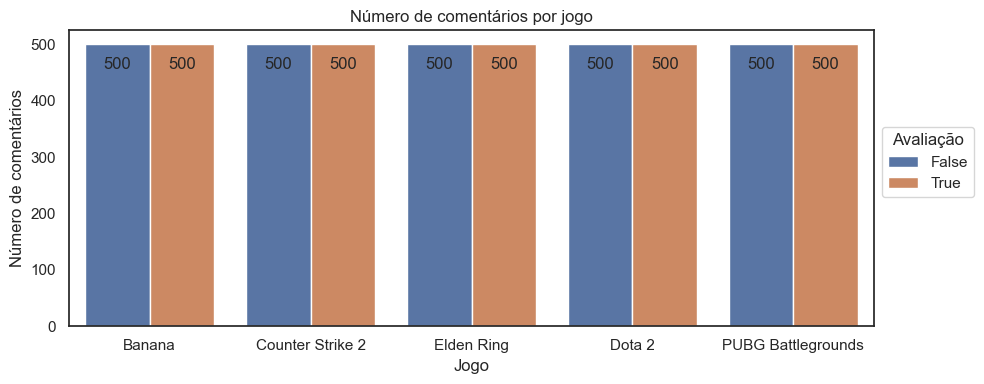

In [18]:
plt.subplots(figsize=(10,4))
p = sns.countplot(df, x='jogo', hue='review_vote')
p.set(
    xlabel='Jogo',
    ylabel='Número de comentários',
    title='Número de comentários por jogo',
)
p.legend(title='Avaliação')
for cont in p.containers:
    p.bar_label(cont, padding=-20)

sns.move_legend(p, "upper left", bbox_to_anchor=(1, 0.7))
plt.tight_layout()
plt.show()


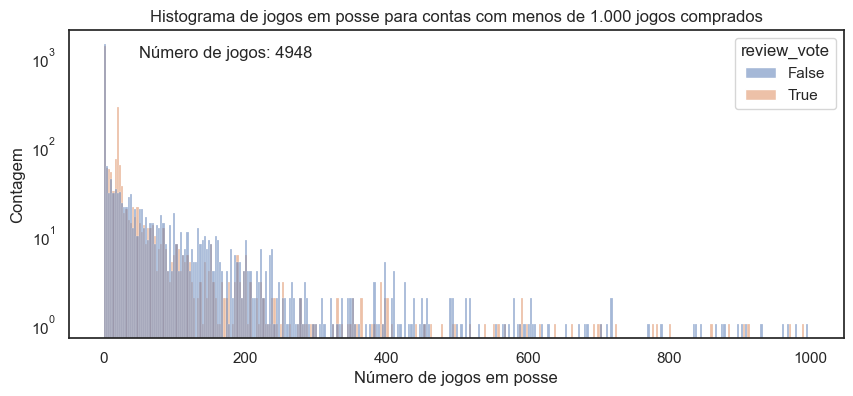

In [19]:
plt.subplots(figsize=(10,4))
p = sns.histplot(df[df['num_games_owned'] < 1000], x='num_games_owned', hue='review_vote')
p.set_yscale("log")
p.text(x=50, y=1_000, 
       s=f"Número de jogos: {df['jogo'][df['num_games_owned'] < 1000].count()}"
       )
p.set(
    title='Histograma de jogos em posse para contas com menos de 1.000 jogos comprados',
    xlabel='Número de jogos em posse',
    ylabel='Contagem',
)
plt.show()


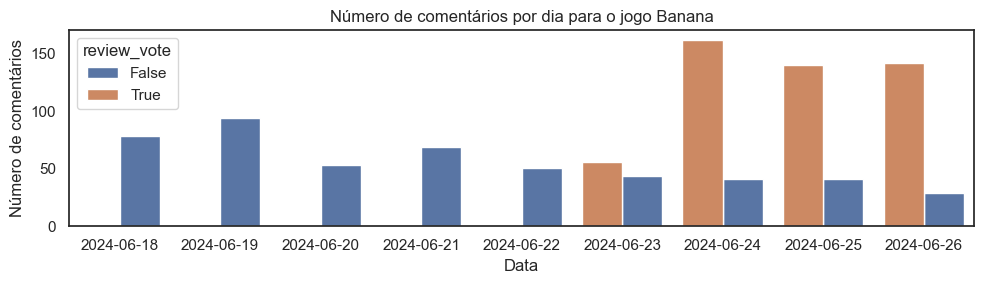

In [20]:
plt.subplots(figsize=(10,3))
g = sns.countplot(df[df['jogo'] == "Banana"], x='date',hue='review_vote')
g.set(
    xlabel='Data',
    ylabel='Número de comentários',
    title='Número de comentários por dia para o jogo Banana',
)
g.invert_xaxis()
plt.tight_layout()
plt.show()

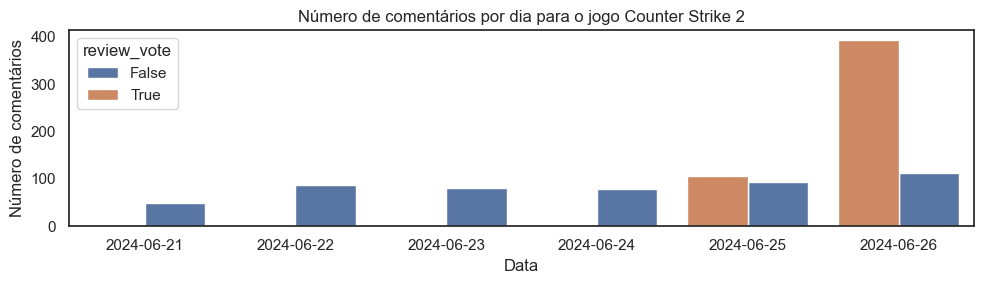

In [21]:
plt.subplots(figsize=(10,3))
g = sns.countplot(df[df['jogo'] == "Counter Strike 2"], x='date', hue='review_vote')
g.set(
    xlabel='Data',
    ylabel='Número de comentários',
    title='Número de comentários por dia para o jogo Counter Strike 2',
)
g.invert_xaxis()
plt.tight_layout()
plt.show()

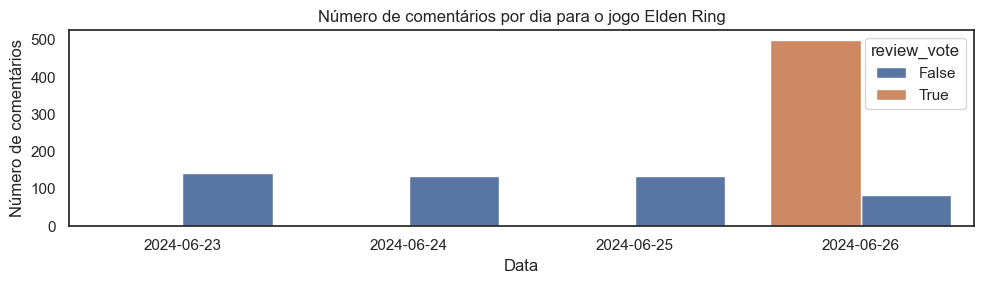

In [22]:
plt.subplots(figsize=(10,3))
g = sns.countplot(df[df['jogo'] == "Elden Ring"], x='date', hue='review_vote')
g.set(
    xlabel='Data',
    ylabel='Número de comentários',
    title='Número de comentários por dia para o jogo Elden Ring',
)
g.invert_xaxis()
plt.tight_layout()
plt.show()

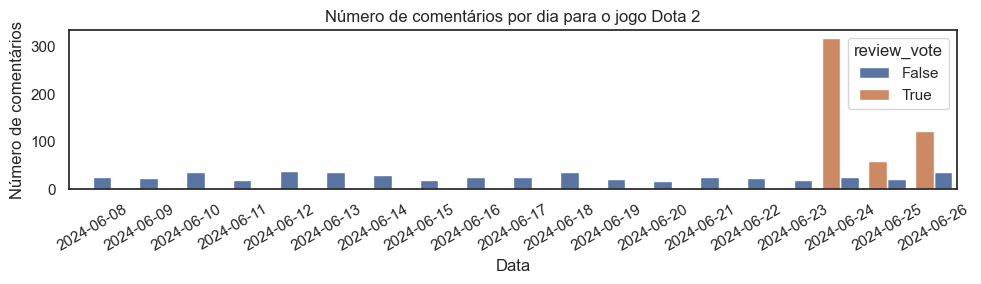

In [23]:
plt.subplots(figsize=(10,3))
g = sns.countplot(df[df['jogo'] == "Dota 2"], x='date', hue='review_vote')
g.set(
    xlabel='Data',
    ylabel='Número de comentários',
    title='Número de comentários por dia para o jogo Dota 2',
)
plt.xticks(rotation=30)
g.invert_xaxis()
plt.tight_layout()
plt.show()

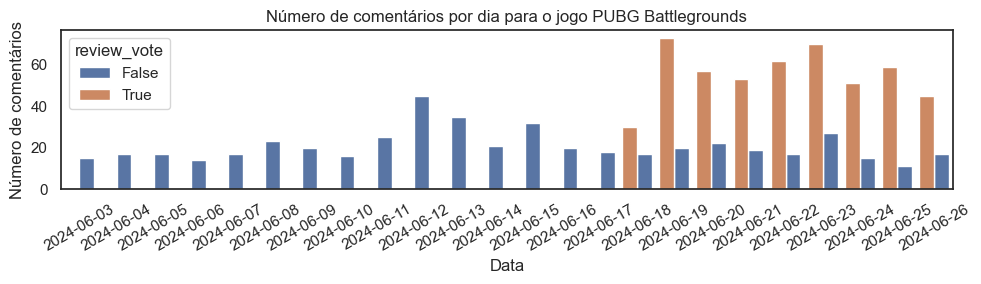

In [187]:

plt.subplots(figsize=(10,3))
g = sns.countplot(df[df['jogo'] == "PUBG Battlegrounds"], x='date', hue='review_vote')
g.set(
    xlabel='Data',
    ylabel='Número de comentários',
    title='Número de comentários por dia para o jogo PUBG Battlegrounds',
)
plt.xticks(rotation=30)
g.invert_xaxis()
plt.tight_layout()
plt.show()

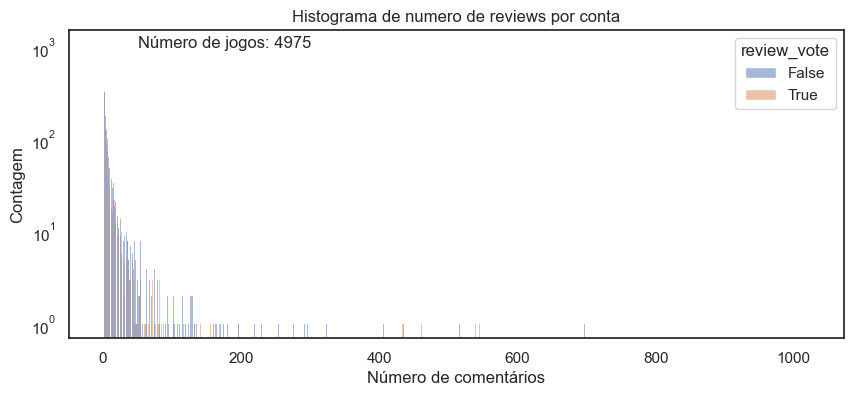

In [188]:
plt.subplots(figsize=(10,4))
p = sns.histplot(df, x='num_reviews', hue='review_vote')
p.set_yscale("log")
p.text(x=50, y=1_000, 
       s=f"Número de jogos: {df['jogo'][df['num_reviews'] < 200].count()}"
       )
p.set(
    title='Histograma de numero de reviews por conta',
    xlabel='Número de comentários',
    ylabel='Contagem',
)
plt.show()


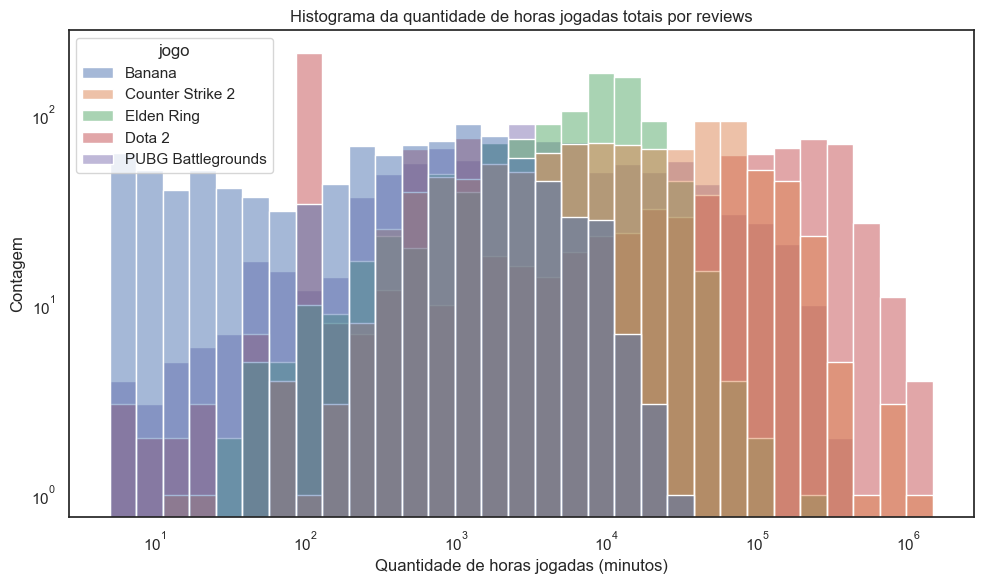

In [189]:
plt.subplots(figsize=(10,6))
p = sns.histplot(df, x='playtime_forever', hue='jogo', log_scale=True)
p.set_yscale("log")
p.set(
    title='Histograma da quantidade de horas jogadas totais por reviews',
    xlabel='Quantidade de horas jogadas (minutos)',
    ylabel='Contagem',
)
plt.tight_layout()
plt.show()


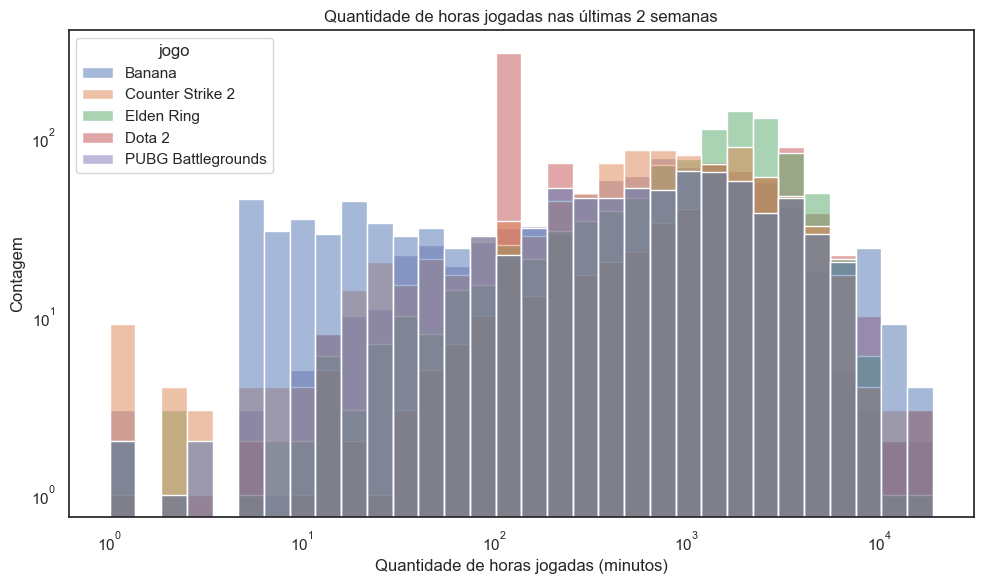

In [190]:
plt.subplots(figsize=(10,6))
p = sns.histplot(df, x='playtime_last_two_weeks', hue='jogo', log_scale=True)
p.set_yscale("log")
p.set(
    title='Quantidade de horas jogadas nas últimas 2 semanas',
    xlabel='Quantidade de horas jogadas (minutos)',
    ylabel='Contagem',
)
plt.tight_layout()
plt.show()




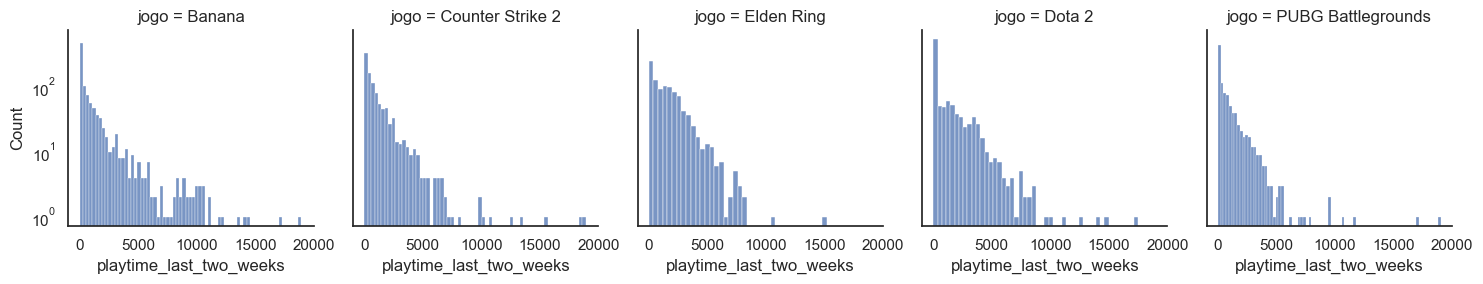

In [27]:
g = sns.FacetGrid(df, col='jogo')
g.map(sns.histplot, 'playtime_last_two_weeks').set(yscale='log')

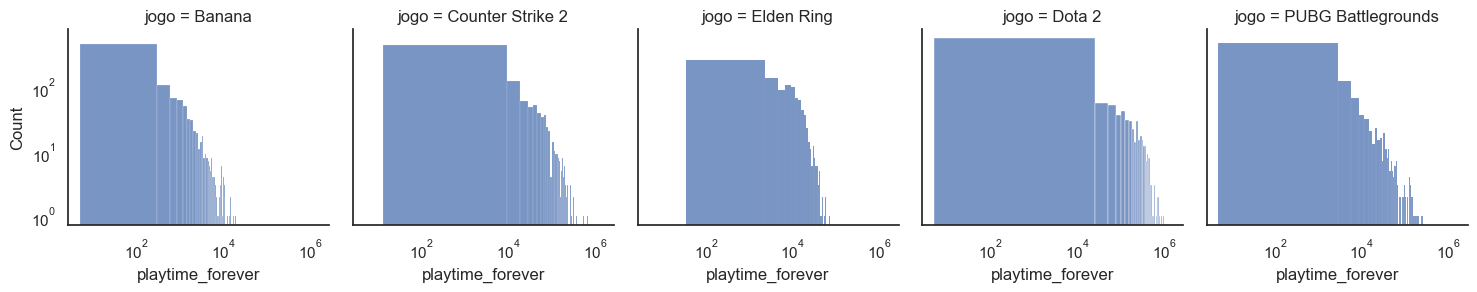

In [28]:
g = sns.FacetGrid(df, col='jogo')
g.map(sns.histplot, 'playtime_forever').set(xscale='log', yscale='log')

[None]

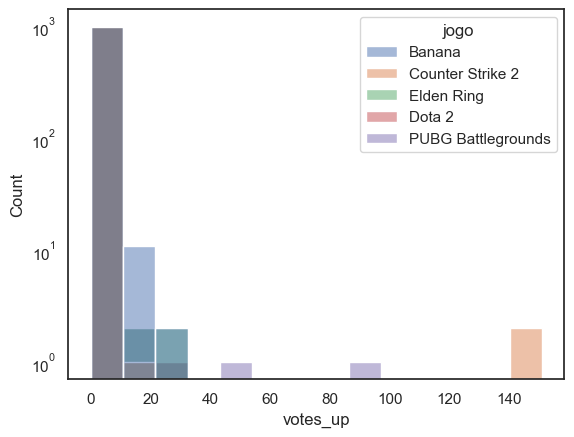

In [29]:
sns.histplot(df, x='votes_up', hue='jogo').set(yscale='log')

<Axes: xlabel='jogo', ylabel='count'>

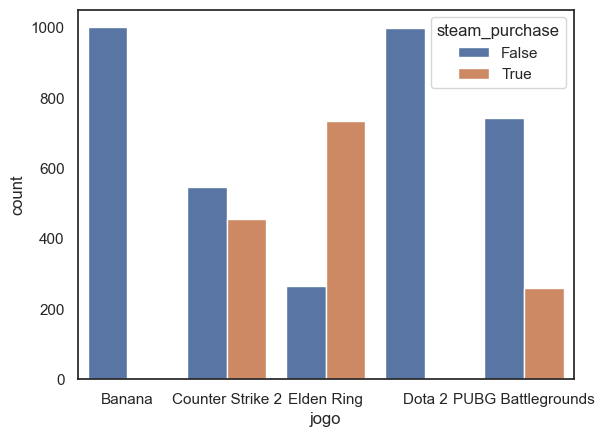

In [203]:
sns.countplot(df, x='jogo', hue='steam_purchase')

<Axes: xlabel='jogo', ylabel='count'>

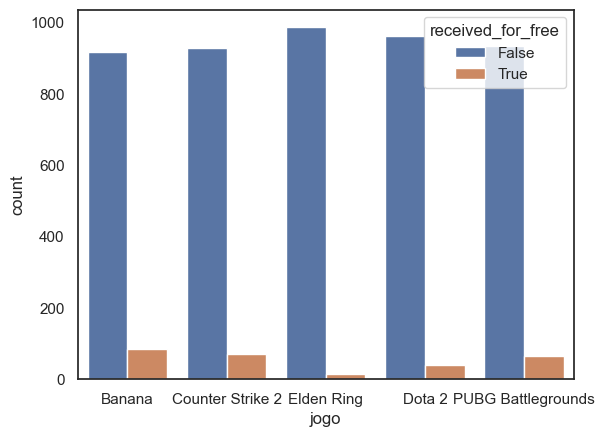

In [31]:
sns.countplot(df, x='jogo', hue='received_for_free')

<Axes: xlabel='jogo', ylabel='count'>

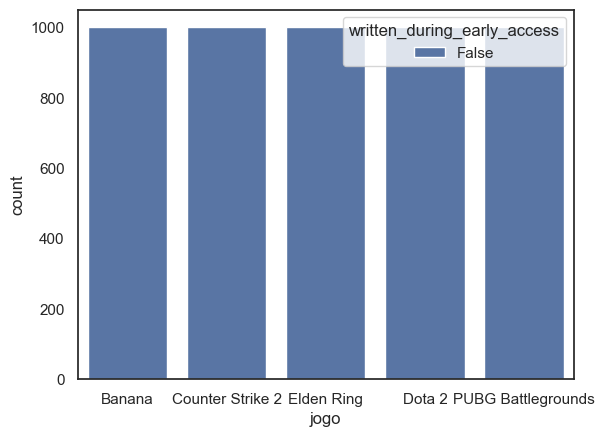

In [32]:
sns.countplot(df, x='jogo', hue='written_during_early_access')

---

### Pré processamento das avaliações

In [116]:
df['review'].head()

0    пацани дивітся як біткойни майніть понастоящему
1                                        ez money ty
2                                                  a
3                                     Very sigma ngl
4           Idk why does this game eat 1,3gb of ram?
Name: review, dtype: object

Limpeza geral

In [117]:
from cleantext import clean

In [118]:
def clean_text(text):

    return clean(text,
        fix_unicode=True,               # fix various unicode errors
        to_ascii=False,                  # transliterate to closest ASCII representation
        lower=True,                     # lowercase text
        no_emoji=True,
        no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
        no_urls=True,                  # replace all URLs with a special token
        no_emails=True,                # replace all email addresses with a special token
        no_phone_numbers=True,         # replace all phone numbers with a special token
        no_numbers=True,               # replace all numbers with a special token
        no_digits=True,                # replace all digits with a special token
        no_currency_symbols=True,      # replace all currency symbols with a special token
        no_punct=True,                 # remove punctuations
        replace_with_punct="",          # instead of removing punctuations you may replace them
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="",
        replace_with_currency_symbol="",
        lang="en"                       # set to 'de' for German special handling
    )

In [119]:
df["review_clean"] = df["review"].apply(lambda text: clean_text(text))
df["review_clean"].head()

0    пацани дивітся як біткойни майніть понастоящему
1                                        ez money ty
2                                                  a
3                                     very sigma ngl
4               idk why does this game eat gb of ram
Name: review_clean, dtype: object

Substituição de gírias e abreviações

In [120]:
with open(f"{folder_path}/data/slangs.json", "r") as file:
    text = file.read()
    ABBREVIATIONS = json.loads(text)
def convert_abbrev(text):
    text = text.split(" ")
    for i,word in enumerate(text):
        if word in ABBREVIATIONS.keys():
            text[i] = ABBREVIATIONS[word]
    return " ".join(text)

In [121]:
df["review_clean"] = df["review_clean"].apply(lambda text: convert_abbrev(text))

In [122]:
df['review_clean'].head()

0    пацани дивітся як біткойни майніть понастоящему
1                               easy money thank you
2                                                  a
3                        very sigma not going to lie
4     i do not know why does this game eat gb of ram
Name: review_clean, dtype: object

Detecção de língua

In [95]:
import cld3

In [123]:
def detect_language(text):
    return cld3.get_language(str(text))[0]

In [124]:
df['language'] = df['review'].apply(lambda text: detect_language(text))

In [125]:
df['review_clean'][df['language'] != 'en'].to_csv(f'{folder_path}/data/not_english_reviews.csv', index=False)

In [126]:
df = df[df['language'] == 'en'].copy()

Remoção de comentários em branco

In [128]:
def biggest_word(text):
    size = 0
    list_of_words = text.split(" ")
    for word in list_of_words:
        if len(word) > size:
            size = len(word)
    return size

def num_words(text):
    return len(text.split(" "))

Seleciona apenas comentários palavras com mais de duas letras

In [129]:
df["biggest_word_size"] = df["review_clean"].apply(lambda text: biggest_word(text))

In [130]:
df = df[(df["biggest_word_size"] > 1)].copy()

In [131]:
df['biggest_word_size'].value_counts().sort_index(ascending=False).head(10)

biggest_word_size
1128    1
61      1
59      1
52      1
42      1
34      4
33      1
32      1
29      2
28      1
Name: count, dtype: int64

Seleciona apenas comentários com palavras de tamanho menor que 20 letras

In [132]:
df = df[(df["biggest_word_size"] < 20)].copy()

In [133]:
df[['review_clean', 'jogo']].to_csv(f"{folder_path}/data/reviews_clean.csv", index=False)

In [134]:
print("número de comentários restantes", df.shape[0])

número de comentários restantes 2974


Número de palavras por comentário

In [136]:
df["review_size"] = df["review_clean"].apply(lambda text: num_words(text))

In [137]:
df['review_size'].value_counts().sort_index(ascending=False).head(20)

review_size
1480    1
1419    1
1015    1
932     1
847     1
814     1
794     1
736     1
690     1
681     1
633     1
626     1
617     1
584     1
558     1
524     1
517     1
514     1
504     2
493     2
Name: count, dtype: int64

Remoção de NaN

In [138]:
df = df[df["review_clean"].notnull()].copy()

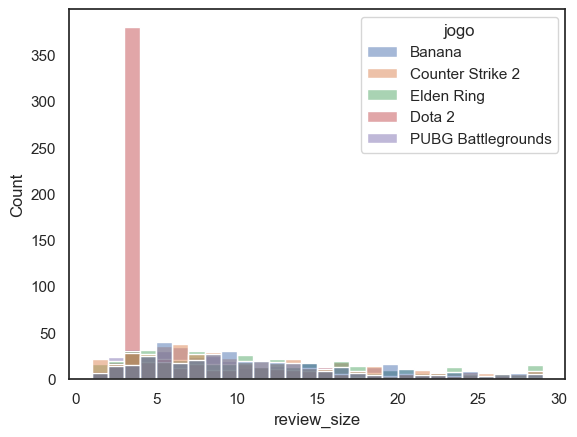

In [139]:
g = sns.histplot(df[df['review_size']<30], x='review_size', hue='jogo', binwidth=1)

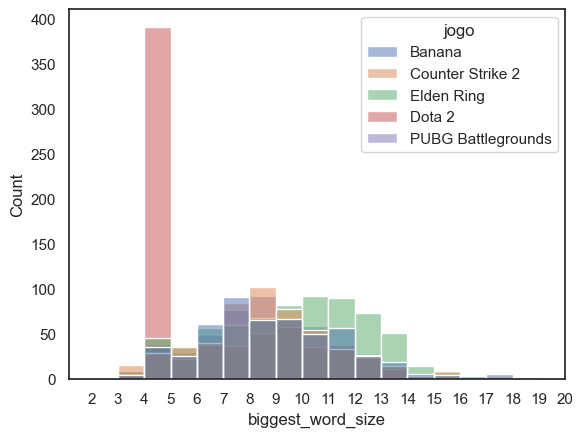

In [140]:
g = sns.histplot(df[df['biggest_word_size']<30], x='biggest_word_size', hue='jogo', binwidth=1)
# set the ticks first 
g.set_xticks(range(2,21)) 
  
# set the labels 
g.set_xticklabels(list(range(2,21))) 
plt.show()

In [141]:
df.to_csv(f'{folder_path}/data/data_cleaned.csv', index=False)

### Tokenização

In [143]:
df = pd.read_csv(f'{folder_path}/data/data_cleaned.csv')

In [144]:
from gensim.utils import simple_preprocess

In [146]:
# Tokenize the text column to get the new column 'tokenized_text'
df['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in df['review_clean']] 
df['tokenized_text'].head(10)

0    [do, not, know, why, does, this, game, eat, gb...
1                                   [best, game, ever]
2                                   [very, good, game]
3                        [peanut, butter, jelly, time]
4    [when, life, gives, you, bananas, make, smooth...
5                                                [yes]
6                      [this, game, changed, my, life]
7    [came, saw, and, clicked, the, bananaand, now,...
8    [this, application, is, for, money, dogs, guys...
9    [whats, with, these, homies, dissing, my, girl...
Name: tokenized_text, dtype: object

### Stemming

In [147]:
from gensim.parsing.porter import PorterStemmer

In [148]:
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
df['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in df['tokenized_text'] ]
df['stemmed_tokens'].head(10)

0    [do, not, know, why, doe, thi, game, eat, gb, ...
1                                   [best, game, ever]
2                                   [veri, good, game]
3                        [peanut, butter, jelli, time]
4    [when, life, give, you, banana, make, smoothi,...
5                                                 [ye]
6                         [thi, game, chang, my, life]
7    [came, saw, and, click, the, bananaand, now, i...
8    [thi, applic, is, for, monei, dog, gui, recomm...
9    [what, with, these, homi, diss, my, girl, why,...
Name: stemmed_tokens, dtype: object

### Dividindo em teste e treino

In [149]:
df.columns

Index(['jogo', 'review', 'steamid', 'date', 'num_games_owned', 'num_reviews',
       'playtime_forever', 'playtime_last_two_weeks', 'last_played',
       'votes_up', 'votes_funny', 'review_vote', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'review_clean', 'language', 'biggest_word_size', 'review_size',
       'tokenized_text', 'stemmed_tokens'],
      dtype='object')

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
# Train Test Split Function
def split_train_test(top_data_df_small, variables, target, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(top_data_df_small[variables],
                                                        top_data_df_small[target], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

variables = ['jogo', 'review', 'steamid', 'date', 'num_games_owned', 'num_reviews',
       'playtime_forever', 'playtime_last_two_weeks', 'last_played',
       'votes_up', 'votes_funny', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'review_clean', 'language', 'biggest_word_size', 'review_size',
       'tokenized_text', 'stemmed_tokens']
target = 'review_vote'

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(df, variables, target)

Value counts for Train sentiments
review_vote
False    1156
True      925
Name: count, dtype: int64
Value counts for Test sentiments
review_vote
False    514
True     379
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index              jogo                                             review  \
0    277            Banana  I get the joke, but there's no need to play it...   
1   2103            Dota 2                                      The Best Game   
2   1273        Elden Ring  best action open world boss fight game i play ...   
3   1032  Counter Strike 2                         That game needs to review?   
4     60            Banana  https://www.youtube.com/watch?v=TAhrt_B9iPA\n\...   

             steamid        date  num_games_owned  num_reviews  \
0  76561199351630005  2024-06-23               57           45   
1  76561199343589579  2024-06-24               20            1   
2  76561199491557459  2024-06-26            

### Criando a embedding usando Word2Vec

In [154]:
from gensim.models import Word2Vec
import time

In [157]:
# Skip-gram model (sg = 1)
size = 1000
window = 3
min_count = 1
workers = 3
sg = 1

word2vec_model_file = folder_path + '/models/word2vec_' + str(size) + '.model'
start_time = time.time()
stemmed_tokens = pd.Series(df['stemmed_tokens']).values
# Train the Word2Vec Model
w2v_model = Word2Vec(stemmed_tokens, min_count = min_count, vector_size = size, workers = workers, window = window, sg = sg)
print("Time taken to train word2vec model: " + str(time.time() - start_time))
w2v_model.save(word2vec_model_file)

Time taken to train word2vec model: 1.9117660522460938


In [168]:
import numpy as np
# Load the model from the model file
sg_w2v_model = Word2Vec.load(word2vec_model_file)
# Unique ID of the word
print("Index of the word 'game':")
print(sg_w2v_model.wv.key_to_index["game"])
# Total number of the words 
print(len(sg_w2v_model.wv.index_to_key))
# Print the size of the word2vec vector for one word
print("Length of the vector generated for a word")
print(sg_w2v_model.wv['game'].shape)

Index of the word 'game':
1
6034
Length of the vector generated for a word
(1000,)


In [170]:
word2vec_filename = folder_path + '/data/train_review_word2vec.csv'
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        model_vector = (np.mean([sg_w2v_model.wv[token] for token in row['stemmed_tokens']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

In [171]:
#Import the DecisionTreeeClassifier
from sklearn.tree import DecisionTreeClassifier

In [173]:
# Load from the filename
word2vec_df = pd.read_csv(word2vec_filename)
#Initialize the model
clf_decision_word2vec = DecisionTreeClassifier()

start_time = time.time()
# Fit the model
clf_decision_word2vec.fit(word2vec_df, Y_train['review_vote'])
print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time))


Time taken to fit the model with word2vec vectors: 1.5025320053100586


Teste

In [181]:
from sklearn.metrics import classification_report
test_features_word2vec = []
for index, row in X_test.iterrows():
    model_vector = np.mean([sg_w2v_model.wv[token] for token in row['stemmed_tokens']], axis=0)
    model_vector = list(model_vector)
    if type(model_vector) is list:
        test_features_word2vec.append(model_vector)
    else:
        test_features_word2vec.append(np.array([0 for i in range(1000)]))


In [183]:
test_predictions_word2vec = clf_decision_word2vec.predict(test_features_word2vec)

/Users/administrador/.virtualenvs/sentiment_analysis/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [185]:
print(classification_report(Y_test['review_vote'],test_predictions_word2vec))

              precision    recall  f1-score   support

       False       0.71      0.71      0.71       514
        True       0.61      0.61      0.61       379

    accuracy                           0.67       893
   macro avg       0.66      0.66      0.66       893
weighted avg       0.67      0.67      0.67       893

